In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

warnings.filterwarnings('ignore')

In [2]:
def cost(x, y, theta):
    h = x.dot(theta)
    E = np.subtract(h, y)
    sqrE = np.square(E)
    J = 1/(2*m)*np.sum(sqrE)
    
    return J

def gradient_descent(x, y, test_x, test_y, theta, alpha, l, iterations):
    cost_history = np.zeros(iterations)
    validation_history = np.zeros(iterations)

    for i in range(iterations):
        h = x.dot(theta)
        e = np.subtract(h, y)
        sum_delta = (alpha/m)*(x.transpose().dot(e) + l*np.array(theta, dtype=np.float32));
        theta = theta - sum_delta;
        cost_history[i] = cost(x, y, theta)
#         validation_history[i] = cost(test_x, test_y, theta+ l*np.array(theta, dtype=np.float32))
        validation_history[i] = cost(test_x, test_y, theta)

    return theta, cost_history, validation_history

def binary_map(x):
    return x.map({'yes':1, "no": 0})

def furnished_map(x):
    return x.map({'furnished':2,'semi-furnished':1, "unfurnished": 0})

In [3]:
df = pd.DataFrame(pd.read_csv('Housing.csv'))
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[varlist] = df[varlist].apply(binary_map)
varlist = ['furnishingstatus']
df[varlist] = df[varlist].apply(furnished_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [4]:
df_train, df_test = train_test_split(df, train_size = .8, test_size = .2)

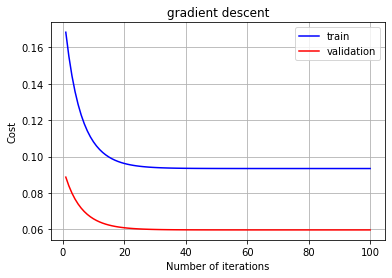

theta = [0.07, 0.02, 0.04, 0.01, 0.02, 0.02]


In [5]:
#part a with Normalization
varlist = ['price','area','bedrooms','bathrooms','stories','parking']
df_Newtrain = df_train[varlist]
df_Newtest = df_test[varlist]

scaler = MinMaxScaler()
df_Newtrain[varlist] = scaler.fit_transform(df_Newtrain[varlist])
df_Newtest[varlist] = scaler.fit_transform(df_Newtest[varlist])


y_Normtrain=df_Newtrain.pop('price')
x_Normtrain = df_Newtrain.copy()
y_Normtest = df_Newtest.pop('price')
x_Normtest = df_Newtest.copy()
x_Normtest.head()

theta = [0, 0, 0, 0, 0, 0]
iterations = 100;
alpha = 0.01
l = 1000

y = y_Normtrain.values
x = x_Normtrain.values
validation_x = x_Normtest.values
validation_y = y_Normtest.values

m = len(y)
x1 = x[:,0].reshape(m, 1)
x2 = x[:,1].reshape(m, 1)
x3 = x[:,2].reshape(m, 1)
x4 = x[:,3].reshape(m, 1)
x5 = x[:,4].reshape(m, 1)

x = np.hstack((np.ones((m, 1)), x1, x2, x3, x4, x5))
m = len(validation_y)
x1 = validation_x[:,0].reshape(m, 1)
x2 = validation_x[:,1].reshape(m, 1)
x3 = validation_x[:,2].reshape(m, 1)
x4 = validation_x[:,3].reshape(m, 1)
x5 = validation_x[:,4].reshape(m, 1)
validation_x = np.hstack((np.ones((m, 1)), x1, x2, x3, x4, x5))

theta, cost_history, validation_history = gradient_descent(x, y, validation_x, validation_y, theta, alpha, l, iterations)

plt.plot(range(1, iterations+1), cost_history, color='blue',  label='train')
plt.plot(range(1, iterations+1), validation_history, color='red', label='validation')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.legend()
plt.title('gradient descent')
plt.show()
print('theta =', [round(item, 2) for item in theta])

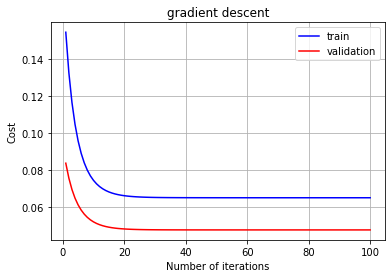

theta = [0.05, 0.02, 0.03, 0.01, 0.02, 0.05, 0.01, 0.02, 0.0, 0.03, 0.02, 0.02]


In [6]:
#part b with Normalization
varlist = ['price','area','bedrooms','bathrooms','stories',
           'mainroad','guestroom','basement', 'hotwaterheating','airconditioning','parking','prefarea']
df_Newtrain = df_train[varlist]
df_Newtest = df_test[varlist]

scaler = MinMaxScaler()
df_Newtrain[varlist] = scaler.fit_transform(df_Newtrain[varlist])
df_Newtest[varlist] = scaler.fit_transform(df_Newtest[varlist])


y_Normtrain=df_Newtrain.pop('price')
x_Normtrain = df_Newtrain.copy()
y_Normtest = df_Newtest.pop('price')
x_Normtest = df_Newtest.copy()
x_Normtest.head()

theta = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
iterations = 100;
alpha = 0.01
l = 1000

y = y_Normtrain.values
x = x_Normtrain.values
validation_x = x_Normtest.values
validation_y = y_Normtest.values

m = len(y)
x1 = x[:,0].reshape(m, 1)
x2 = x[:,1].reshape(m, 1)
x3 = x[:,2].reshape(m, 1)
x4 = x[:,3].reshape(m, 1)
x5 = x[:,4].reshape(m, 1)
x6 = x[:,5].reshape(m, 1)
x7 = x[:,6].reshape(m, 1)
x8 = x[:,7].reshape(m, 1)
x9 = x[:,8].reshape(m, 1)
x10 = x[:,9].reshape(m, 1)
x11 = x[:,10].reshape(m, 1)
x = np.hstack((np.ones((m, 1)), x1, x2, x3, x4, x5,x6, x7, x8, x9, x10, x11))

m = len(validation_y)
x1 = validation_x[:,0].reshape(m, 1)
x2 = validation_x[:,1].reshape(m, 1)
x3 = validation_x[:,2].reshape(m, 1)
x4 = validation_x[:,3].reshape(m, 1)
x5 = validation_x[:,4].reshape(m, 1)
x6 = validation_x[:,5].reshape(m, 1)
x7 = validation_x[:,6].reshape(m, 1)
x8 = validation_x[:,7].reshape(m, 1)
x9 = validation_x[:,8].reshape(m, 1)
x10 = validation_x[:,9].reshape(m, 1)
x11 = validation_x[:,10].reshape(m, 1)

validation_x = np.hstack((np.ones((m, 1)), x1, x2, x3, x4, x5,x6, x7, x8, x9, x10, x11))

theta, cost_history, validation_history = gradient_descent(x, y, validation_x, validation_y, theta, alpha, l, iterations)

plt.plot(range(1, iterations+1), cost_history, color='blue',  label='train')
plt.plot(range(1, iterations+1), validation_history, color='red', label='validation')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.legend()
plt.title('gradient descent')
plt.show()
print('theta =', [round(item, 2) for item in theta])